# Launch Turi Create

In [1]:
import turicreate

# Load house sales data

In [2]:
sales = turicreate.SFrame('./home_data.sframe/')

In [3]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


# Explore

In [4]:
sales.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [5]:
turicreate.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Simple regression model that predicts price from square feet

In [6]:
training_set, test_set = sales.random_split(.8,seed=0)

## train simple regression model

In [7]:
sqft_model = turicreate.linear_regression.create(training_set,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.018179     | 4348994.211083     | 1768148.533580       | 262886.208452                   | 264032.326964                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Evaluate the quality of our model

In [8]:
print (test_set['price'].mean())

543054.0425632538


In [9]:
print (sqft_model.evaluate(test_set))

{'max_error': 4143095.811159987, 'rmse': 255188.94031354843}


# Explore model a little further

In [10]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-46991.56336506293,5047.262754555601
sqft_living,None,281.9914815171968,2.2173376451771296


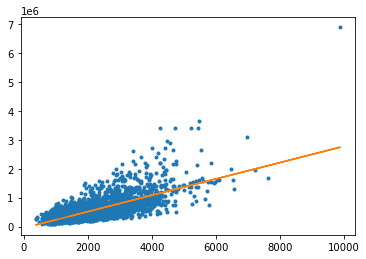

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

# Explore other features of the data

In [12]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [13]:
sales[my_features].show()

Materializing SFrame

In [14]:
turicreate.show(sales['zipcode'],sales['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Build a model with these additional features

In [15]:
my_features_model = turicreate.linear_regression.create(training_set,target='price',features=my_features)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 0.054717     | 4081107.651857     | 1856284.625163       | 188826.734437                   | 196899.522498                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Compare simple model with more complex one

In [16]:
print (my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [17]:
print (sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

{'max_error': 4143095.811159987, 'rmse': 255188.94031354843}
{'max_error': 3145252.794044623, 'rmse': 180498.12711431872}


# Apply learned models to make predictions

In [18]:
house1 = sales[sales['id']=='5309101200']

In [19]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [20]:
print (house1['price'])

[620000.0, ... ]


In [21]:
print (sqft_model.predict(house1))

[629787.9922762094]


In [22]:
print (my_features_model.predict(house1))

[731694.4930193252]


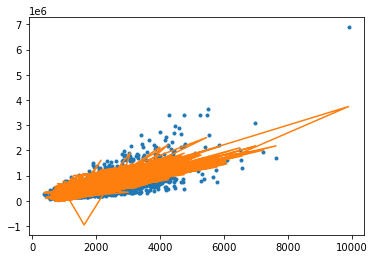

In [23]:
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],my_features_model.predict(test_set),'-')

## Prediction for a second house, a fancier one

In [24]:
house2 = sales[sales['id']=='1925069082']

In [25]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [26]:
print (sqft_model.predict(house2))

[1261448.9108747302]


In [27]:
print (my_features_model.predict(house2))

[1236063.40827436]


## Prediction for a super fancy home

In [28]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

In [29]:
print (my_features_model.predict(turicreate.SFrame(bill_gates)))

[15077305.778790066]


# homework 1


## primera pregunta :
 In the notebook we covered in the module, we discovered which neighborhood (zip code) of Seattle had the highest average house sale price.  Now, take the sales data, select only the houses with this zip code, and compute the average price.  Save this result to answer the quiz at the end.
### median = average

In [36]:
zipcodes=sales['zipcode']
prices = sales['price']
turicreate.show(zipcodes,prices )
print(zipcodes)

Materializing X axis SArray

Materializing Y axis SArray

['98178', '98125', '98028', '98136', '98074', '98053', '98003', '98198', '98146', '98038', '98007', '98115', '98028', '98074', '98107', '98126', '98019', '98103', '98002', '98003', '98133', '98040', '98092', '98030', '98030', '98002', '98119', '98112', '98115', '98052', '98027', '98133', '98117', '98117', '98058', '98115', '98052', '98107', '98001', '98056', '98074', '98166', '98053', '98119', '98058', '98019', '98023', '98007', '98115', '98070', '98148', '98056', '98117', '98117', '98105', '98105', '98042', '98042', '98008', '98059', '98166', '98148', '98166', '98115', '98122', '98144', '98004', '98001', '98042', '98004', '98005', '98034', '98125', '98038', '98042', '98075', '98008', '98116', '98133', '98010', '98038', '98038', '98118', '98059', '98125', '98119', '98092', '98056', '98056', '98136', '98023', '98199', '98023', '98117', '98117', '98040', '98032', '98023', '98038', '98045', ... ]


In [46]:
zipcodes = sales[sales['zipcode']=='98039']
zipcodes['price'].mean()

2160606.5999999996

## 2da Pregunta
For this part, we are going to use the idea of filtering (selecting) data.

Using such filters, first select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft.
What fraction of the all houses have ‘sqft_living’ in this range? Save this result to answer the quiz at the end.

In [48]:
houses = sales[(sales['sqft_living'] > 2000) & (sales['sqft_living'] <= 4000)]
houses

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
1736800520,2015-04-03 00:00:00+00:00,662500.0,3.0,2.5,3560.0,9796.0,1.0,0
9297300055,2015-01-24 00:00:00+00:00,650000.0,4.0,3.0,2950.0,5000.0,2.0,0
2524049179,2014-08-26 00:00:00+00:00,2000000.0,3.0,2.75,3050.0,44867.0,1.0,0
7137970340,2014-07-03 00:00:00+00:00,285000.0,5.0,2.5,2270.0,6300.0,2.0,0
3814700200,2014-11-20 00:00:00+00:00,329000.0,3.0,2.25,2450.0,6500.0,2.0,0
1794500383,2014-06-26 00:00:00+00:00,937000.0,3.0,1.75,2450.0,2691.0,2.0,0
1873100390,2015-03-02 00:00:00+00:00,719000.0,4.0,2.5,2570.0,7173.0,2.0,0
8562750320,2014-11-10 00:00:00+00:00,580500.0,3.0,2.5,2320.0,3980.0,2.0,0
0461000390,2014-06-24 00:00:00+00:00,687500.0,4.0,1.75,2330.0,5000.0,1.5,0


In [50]:
fraccion = len(houses)*1.0/len(sales)
print("la fraccion es: ", fraccion)

la fraccion es:  0.42187572294452413


## 3ra Pregunta
3. Building a regression model with several more features:  In the sample notebook, we built two regression models to predict house prices, one using just ‘sqft_living’ and the other one using a few more features, we called this set

In [52]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

Compute the RMSE (root mean squared error) on the test_data for the model using just my_features, and for the one using advanced_features.
Note 1: both models must be trained on the original sales train dataset, not the one filtered on `sqft_living`.

     Note 2:  when doing the train-test split, make sure you use seed=0, so you get the same training and test sets, and thus results, as we do.  

    Note 3:  in the module we discussed residual sum of squares (RSS) as an error metric for regression, but Turi Create uses root mean squared error (RMSE).  These are two common measures of error regression, and RMSE is simply the square root of the mean RSS: 

In [53]:
train_data,test_data = sales.random_split(.8,seed=0)

In [62]:

sqft_model = turicreate.linear_regression.create(train_data, target='price', features=my_features ,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.054404     | 4086543.315840     | 189216.804808                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [63]:
print(sqft_model.evaluate(test_data))

{'max_error': 3152242.784868988, 'rmse': 180439.07296640595}


In [64]:
advan_model = turicreate.linear_regression.create(train_data, target='price', features = advanced_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.033572     | 4336058.938762     | 162392.982702                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

In [66]:
print(advan_model.evaluate(test_data))

{'max_error': 3170363.181382781, 'rmse': 155269.6579279753}
